In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [2]:
housevalue = fch()

In [3]:
housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [5]:
housevalue.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [10]:
X=pd.DataFrame(housevalue.data)

In [11]:
y=housevalue.target

In [12]:
[*X.columns]

[0, 1, 2, 3, 4, 5, 6, 7]

In [13]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
           ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [14]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [16]:
#数据集索引恢复
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [17]:
#使用岭回归来进行建模
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)

In [18]:
reg.score(Xtest,Ytest)

0.6043610352312279

In [22]:
from sklearn.model_selection import cross_val_score
alpharange=np.arange(1,1001,100)
ridge,lr=[],[]
for alpha in alpharange:
    reg=Ridge(alpha=alpha)
    linear=LinearRegression()
    regs=cross_val_score(reg,X,y,cv=5,scoring="r2").mean()
    linears=cross_val_score(linear,X,y,cv=5,scoring="r2").mean()
    ridge.append(regs)
    lr.append(linears)

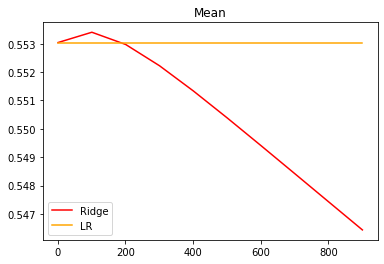

In [24]:
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

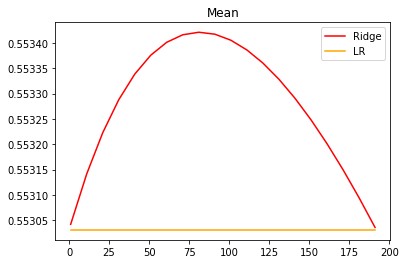

In [27]:
from sklearn.model_selection import cross_val_score
alpharange = np.arange(1,201,10)#细化一下
ridge,lr=[],[]
for alpha in alpharange:
    reg=Ridge(alpha=alpha)
    linear=LinearRegression()
    regs=cross_val_score(reg,X,y,cv=5,scoring="r2").mean()
    linears=cross_val_score(linear,X,y,cv=5,scoring="r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

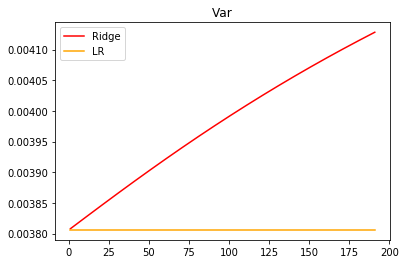

In [29]:
from sklearn.model_selection import cross_val_score
alpharange = np.arange(1,201,10)#细化一下
ridge,lr=[],[]
for alpha in alpharange:
    reg=Ridge(alpha=alpha)
    linear=LinearRegression()
    regR=cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    linearR=cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(regR)
    lr.append(linearR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Var")
plt.legend()
plt.show()

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
           ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                #,scoring="neg_mean_squared_error"
                 ,store_cv_values=True
                #,cv=5
               ).fit(X, y)


In [31]:
#无关交叉验证的岭回归结果
Ridge_.score(X,y)

0.6060251767338428

In [32]:
#调用所有交叉验证的结果
Ridge_.cv_values_.shape

(20640, 10)

In [33]:
#进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [34]:
#查看被选择出来的最佳正则化系数
Ridge_.alpha_


101